In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [18]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Wine_data\cleaned_dataset_Wine.csv")

In [19]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Quality
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Quality               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [21]:
df['Quality'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
df['Quality'].value_counts()

Quality
1    71
0    59
2    48
Name: count, dtype: int64

# X and y

In [23]:
X = df.drop('Quality', axis = 1)
y = df['Quality']

# Train_Test_Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

# Modelling


**Logistic regression(BaseLine model)**

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# Evaluation

**Train**

In [27]:
# Prediction
ypred_train = log_reg.predict(X_train)

# train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(y_train, ypred_train))

# cross alidation score
from sklearn.model_selection import cross_val_score
print("CV SCORE : ", cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = 'accuracy').mean())


Train Accuracy :  1.0
CV SCORE :  1.0


**Test**

In [28]:
ypred_test = log_reg.predict(X_test)
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))


Test Accuracy :  0.9722222222222222


# Confusion Metrics

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  7]], dtype=int64)

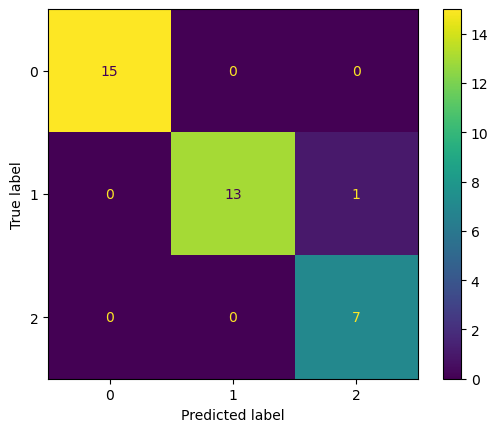

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = df['Quality'].unique()).plot()
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [32]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc= roc_auc).plot()
plt.show()

ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, ypred_test)

# Final model 
**This model is performing well**